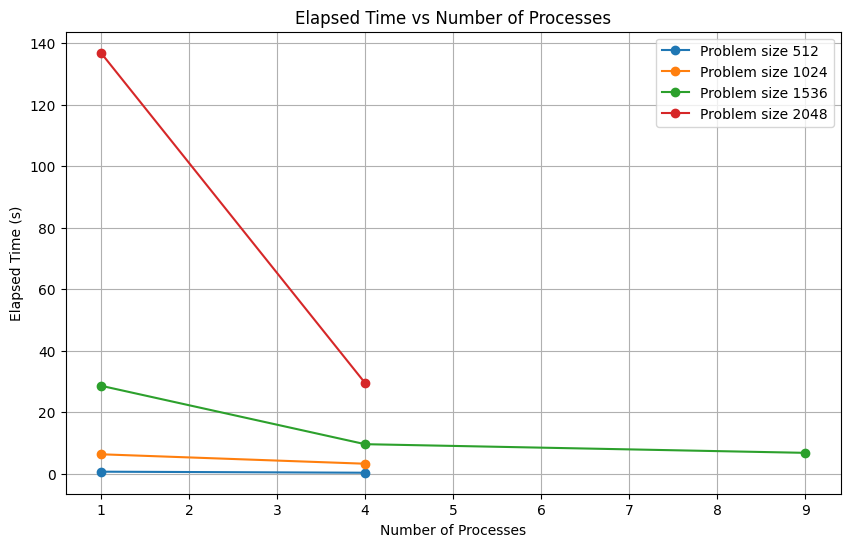

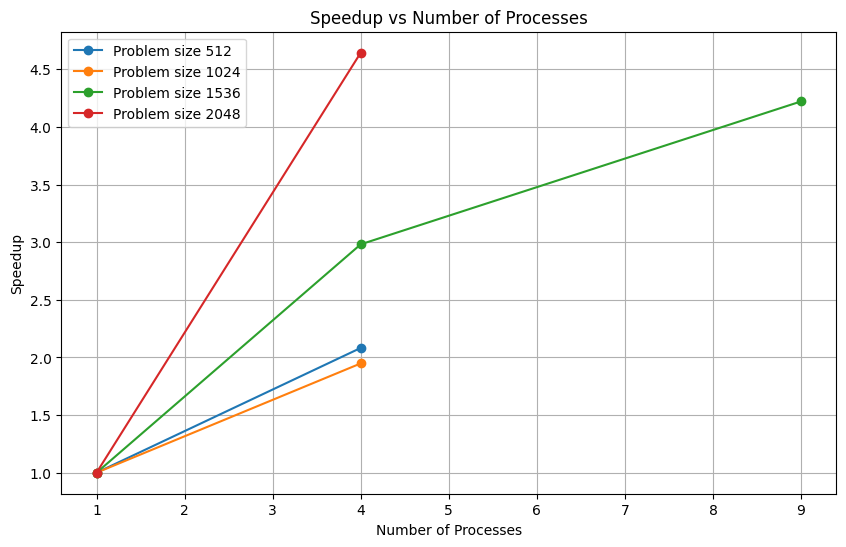

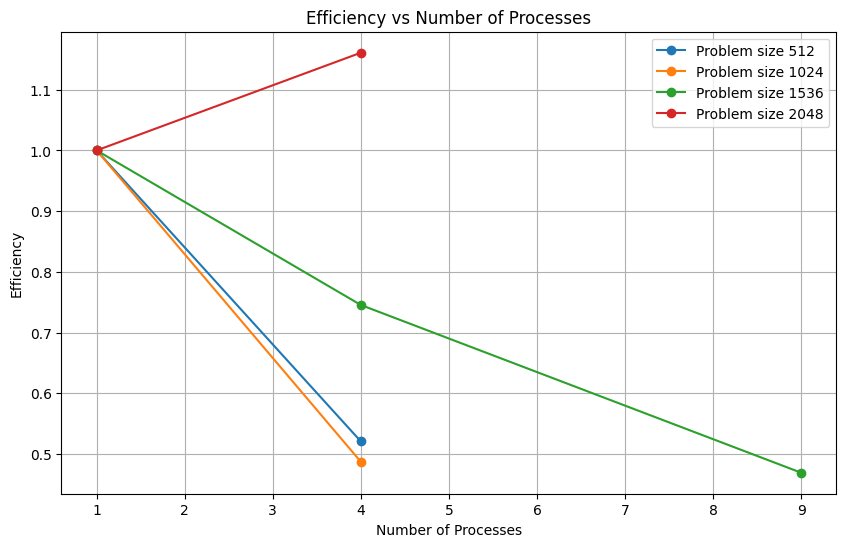

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data_from_csv(file_path):
    return pd.read_csv(file_path, names=["process_count", "problem_size", "elapsed_time"])

def calculate_speedup(elapsed_times, process_counts):
    baseline_times = elapsed_times[process_counts == 1].reset_index(drop=True)
    return baseline_times.iloc[0] / elapsed_times

def calculate_efficiency(speedup, process_counts):
    return speedup / process_counts

def plot_elapsed_time(df, output_file):
    plt.figure(figsize=(10, 6))
    for size in df["problem_size"].unique():
        subset = df[df["problem_size"] == size]
        plt.plot(
            subset["process_count"],
            subset["elapsed_time"],
            marker="o",
            label=f"Problem size {size}"
        )
    plt.xlabel("Number of Processes")
    plt.ylabel("Elapsed Time (s)")
    plt.title("Elapsed Time vs Number of Processes")
    plt.legend()
    plt.grid(True)
    plt.savefig(f'data_second/{output_file}')
    plt.show()

def plot_speedup(df, output_file):
    plt.figure(figsize=(10, 6))
    for size in df["problem_size"].unique():
        subset = df[df["problem_size"] == size]
        speedup = calculate_speedup(subset["elapsed_time"], subset["process_count"])
        plt.plot(
            subset["process_count"],
            speedup,
            marker="o",
            label=f"Problem size {size}"
        )
    plt.xlabel("Number of Processes")
    plt.ylabel("Speedup")
    plt.title("Speedup vs Number of Processes")
    plt.legend()
    plt.grid(True)
    plt.savefig(f'data_second/{output_file}')
    plt.show()

def plot_efficiency(df, output_file):
    plt.figure(figsize=(10, 6))
    for size in df["problem_size"].unique():
        subset = df[df["problem_size"] == size]
        speedup = calculate_speedup(subset["elapsed_time"], subset["process_count"])
        efficiency = calculate_efficiency(speedup, subset["process_count"])
        plt.plot(
            subset["process_count"],
            efficiency,
            marker="o",
            label=f"Problem size {size}"
        )
    plt.xlabel("Number of Processes")
    plt.ylabel("Efficiency")
    plt.title("Efficiency vs Number of Processes")
    plt.legend()
    plt.grid(True)
    plt.savefig(f'data_second/{output_file}')
    plt.show()

csv_file = "data_second/results.csv"
df = load_data_from_csv(csv_file)

plot_elapsed_time(df, 'execution_time_plot.png')
plot_speedup(df, 'speedup_plot.png')
plot_efficiency(df, 'efficiency_plot.png')